# Exploring factors that contributed to the survival of passengers on the Titanic.

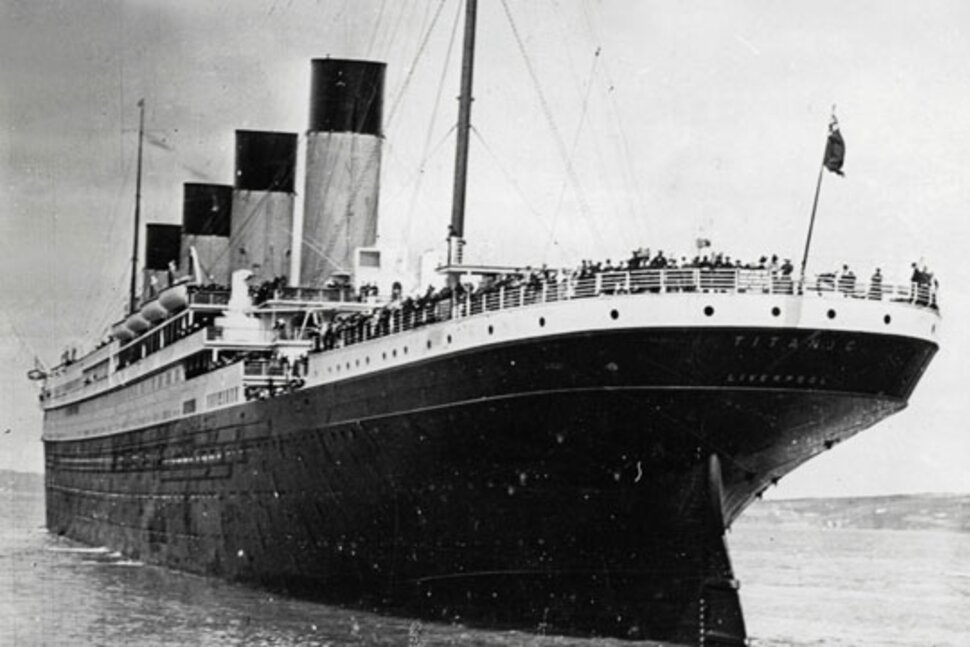


Titanic, launched on May 31, 1911, set to sail on its maiden voyage from Southampton on April 10, 1912, with 2,240 passengers and crew on board. On April 15, 1912, after striking an iceberg, Titanic broke apart and sank to the bottom of the ocean, taking with it the lives of more than 1,500 passengers and crew.

In [1]:
# importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading my data
df=pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

# exploring the data set

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


** Data types are apposite except for AGE which we will address during cleaning**

# Dataset has 891 rows and 12 columns



In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# descriptions of the columns

pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd) 

Age: (Age in years)

Sibsp: of siblings / spouses aboard the Titanic 

Parch:  of parents / children aboard the Titanic

Ticket: Ticket number fare - Passenger fare

Cabin: Cabin number 

Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [7]:
# identifying missing values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
 # checking for duplicates
    
df.duplicated().sum()

0

**No duplicate in the dataset**

# Data Cleaning

1. **Handling missing values 2. Categorizing the age column**

In [9]:
# droping the cabin column
df.drop(columns='Cabin', inplace=True)


In [10]:
#Replacing the missing values in the Embarked column with the most occurring
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

**Port "S" is the mode, hence, the empty values would be replaced with "S"**

In [11]:
df['Embarked'].fillna("S", inplace=True)

In [12]:
df.dropna(inplace = True)

In [13]:
df["Age Category"] = pd.cut(x = df["Age"], bins = [0,10,20,30,40,50,60,70,80,90], 
                            labels = ["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","above 80"])

In [14]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Age Category    0
dtype: int64

In [15]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,  4.  ,
       58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

# Explanatory Data Analysis

In [16]:
# Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,714.0,448.582633,259.119524,1.00,222.250,445.0000,677.750,891.0000
Survived,714.0,0.406162,0.491460,0.00,0.000,0.0000,1.000,1.0000
Pclass,714.0,2.236695,0.838250,1.00,1.000,2.0000,3.000,3.0000
Age,714.0,29.699118,14.526497,0.42,20.125,28.0000,38.000,80.0000
SibSp,714.0,0.512605,0.929783,0.00,0.000,0.0000,1.000,5.0000
Parch,714.0,0.431373,0.853289,0.00,0.000,0.0000,1.000,6.0000
Fare,714.0,34.694514,52.918930,0.00,8.050,15.7417,33.375,512.3292


**Observations**:

1. There are 714 records on passengers.
2. The minimum, median and maximum ages are 0.4 (about 5months), 28 and 80years respectively.
3. The average passenger fare is about 34.69 while the maximum is about 512.23
4. There is a survival rate of 40.61%


In [17]:
df.corr()

C:\Users\Use\AppData\Local\Temp\ipykernel_19760\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029340,-0.035349,0.036847,-0.082398,-0.011617,0.009592
Survived,0.029340,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189
Pclass,-0.035349,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.082398,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329
Parch,-0.011617,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119
Fare,0.009592,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000


**Observations:**

# Survival Rate based on different features¶

In [18]:
#Survival rate by Passenger Class
df_pclass = df["Survived"].groupby(by=df["Pclass"]).sum()

In [19]:
df_pclass

Pclass
1    122
2     83
3     85
Name: Survived, dtype: int64

In [20]:
per_survived_by_Pclass = df_pclass/df_pclass.sum()*100
per_survived_by_Pclass

Pclass
1    42.068966
2    28.620690
3    29.310345
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Survival rate by Passenger Class')

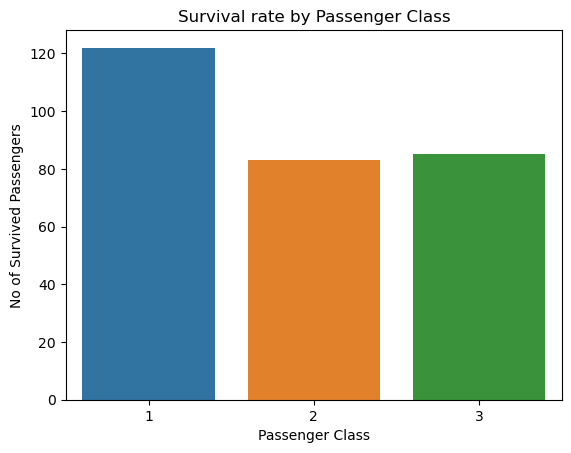

In [21]:
sns.barplot(x="Pclass", y ="Survived", data= df_pclass.reset_index())
plt.xlabel("Passenger Class")
plt.ylabel("No of Survived Passengers")
plt.title("Survival rate by Passenger Class")

In [22]:
#Survival rate by gender
df_gender = df["Survived"].groupby(by=df["Sex"]).sum()
df_gender

Sex
female    197
male       93
Name: Survived, dtype: int64

In [23]:
percent_gender= np.round(df_gender/df_gender.sum()*100,2)
percent_gender

Sex
female    67.93
male      32.07
Name: Survived, dtype: float64

**We have female survival to be 67% while male survival was 32%**

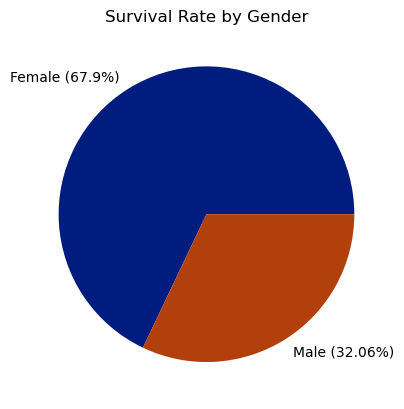

In [24]:
keys = ["Female (67.9%)", "Male (32.06%)"]
palette_color = sns.color_palette("dark")
plt.pie (df_gender, labels=keys, colors=palette_color)
plt.title ("Survival Rate by Gender");

In [25]:
#Survival rate by Sibsp
df_Sibsp = df["Survived"].groupby(by=df["SibSp"]).sum().reset_index()
df_Sibsp

,SibSp,Survived
0,0,175
1,1,97
2,2,11
3,3,4
4,4,3
5,5,0


Text(0.5, 1.0, 'Survival rate by SibSp')

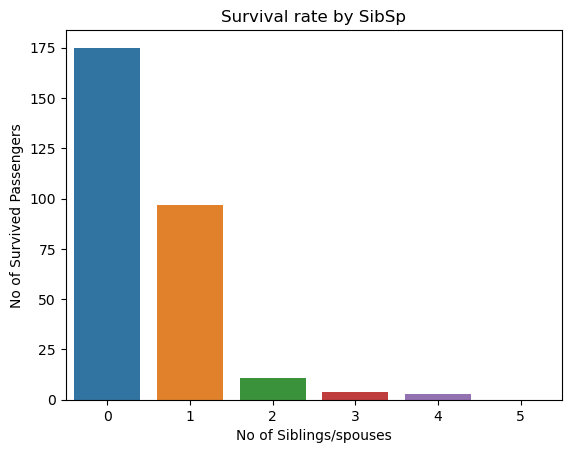

In [26]:
sns.barplot(x="SibSp", y ="Survived", data=df_Sibsp)
plt.xlabel("No of Siblings/spouses")
plt.ylabel("No of Survived Passengers")
plt.title("Survival rate by SibSp")

In [29]:
#Survival rate by Age
df_age = df["Survived"].groupby(by=df["Age"]).sum().reset_index()
df_age_sorted= df_age.sort_values(by= "Survived", ascending=False)

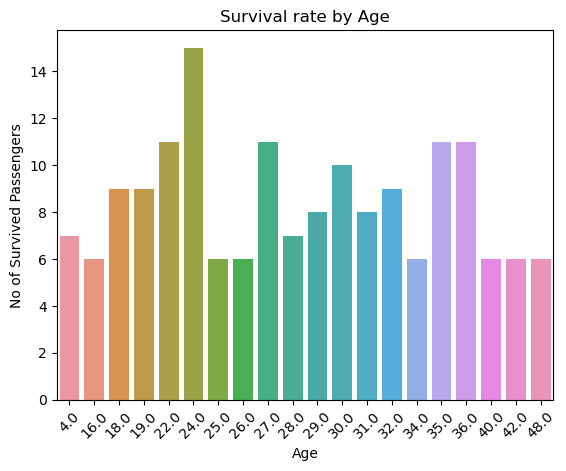

In [30]:
sns.barplot(x="Age", y ="Survived", data= df_age_sorted[0:20])
plt.xlabel("Age")
plt.ylabel("No of Survived Passengers")
plt.title("Survival rate by Age")
plt.xticks(rotation = 45);

In [31]:
#Survival rate by Age Category
df_ageCategory = df["Survived"].groupby(by=df["Age Category"]).sum().reset_index()
df_ageCategory

,Age Category,Survived
0,0-9,38
1,10-19,44
2,20-29,84
3,30-39,69
4,40-49,33
5,50-59,17
6,60-69,4
7,70-79,1
8,above 80,0


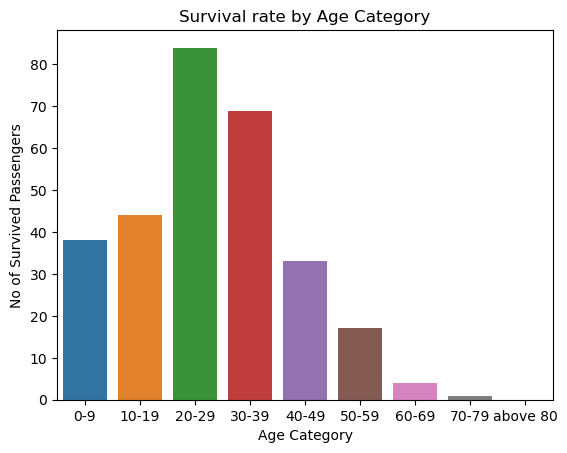

In [32]:
sns.barplot(x="Age Category", y ="Survived", data= df_ageCategory)
plt.xlabel("Age Category")
plt.ylabel("No of Survived Passengers")
plt.title("Survival rate by Age Category");


In [35]:
df_Embarked= df['Survived'].groupby(by=df['Embarked']).sum()
df_Embarked

Embarked
C     79
Q      8
S    203
Name: Survived, dtype: int64

In [37]:
#percentage of Embarked
np.round(df_Embarked/df_Embarked.sum()*100,2)

Embarked
C    27.24
Q     2.76
S    70.00
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Survival Rate by Port of Embarkation')

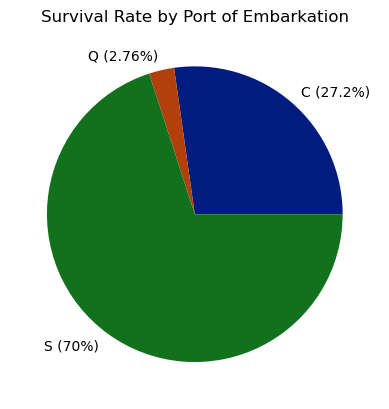

In [40]:
keys= ["C (27.2%)", "Q (2.76%)", "S (70%)"]
palette_color = sns.color_palette("dark")
plt.pie(df_Embarked, labels=keys, colors= palette_color)
plt.title ("Survival Rate by Port of Embarkation")

**Univariate Analysis**

Text(0.5, 1.0, 'Distribution Of Age')

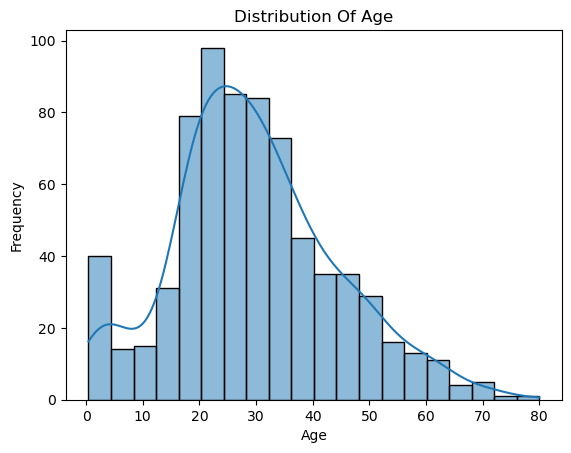

In [41]:
sns.histplot(df["Age"], bins = 20, kde =1)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution Of Age")

Text(0.5, 1.0, 'Distribution Of Fare')

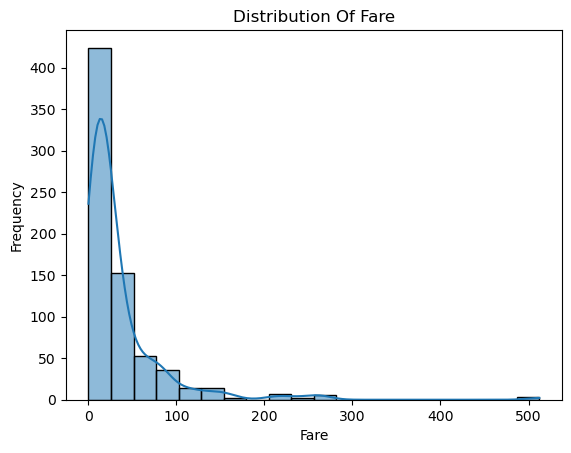

In [43]:
sns.histplot(df["Fare"], bins = 20, kde =1)
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Distribution Of Fare")

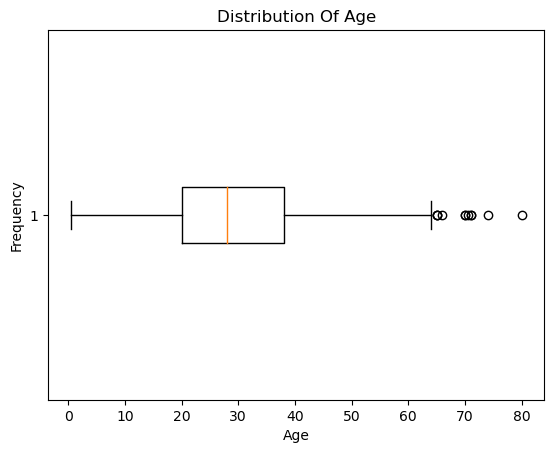

In [44]:
plt.boxplot(df["Age"], vert=False)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution Of Age");

**Here there is an outlier with in age 25**

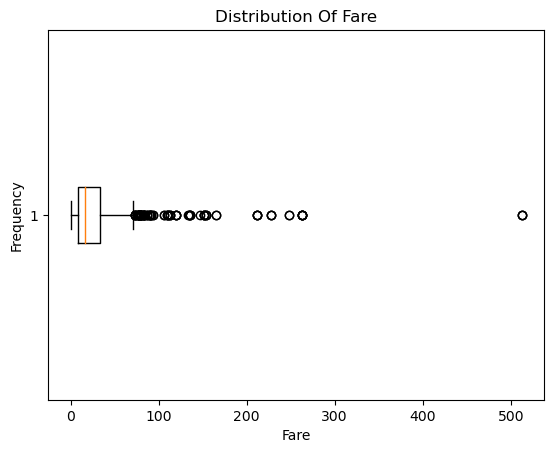

In [45]:
plt.boxplot(df["Fare"], vert=False)
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Distribution Of Fare");

**There is outlier fare rate around (13-20)$**

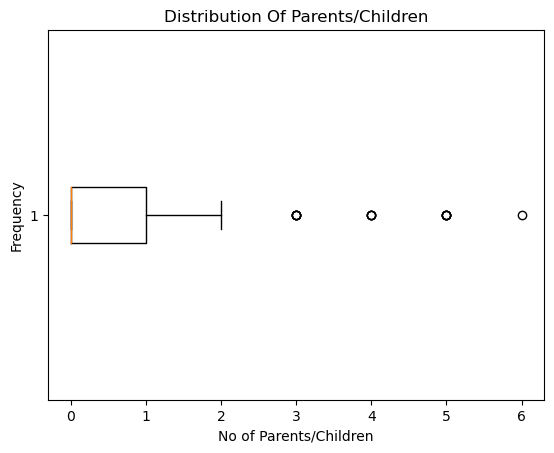

In [49]:
plt.boxplot(df["Parch"], vert = False)
plt.xlabel("No of Parents/Children")
plt.ylabel("Frequency")
plt.title("Distribution Of Parents/Children");

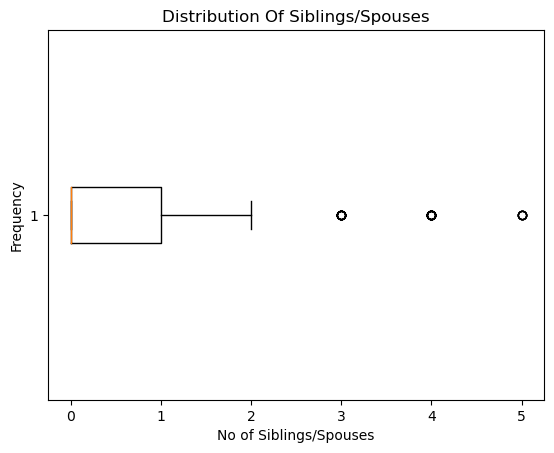

In [50]:
plt.boxplot(df["SibSp"], vert = False)
plt.xlabel("No of Siblings/Spouses")
plt.ylabel("Frequency")
plt.title("Distribution Of Siblings/Spouses");

# Category Data

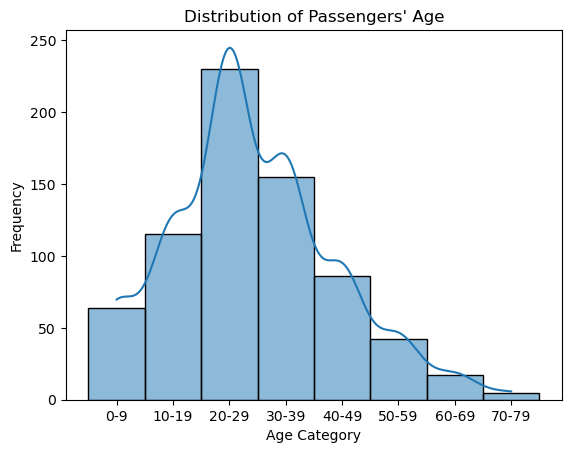

In [51]:
sns.histplot(df["Age Category"], kde = 1)
plt.ylabel("Frequency")
plt.title("Distribution of Passengers' Age");

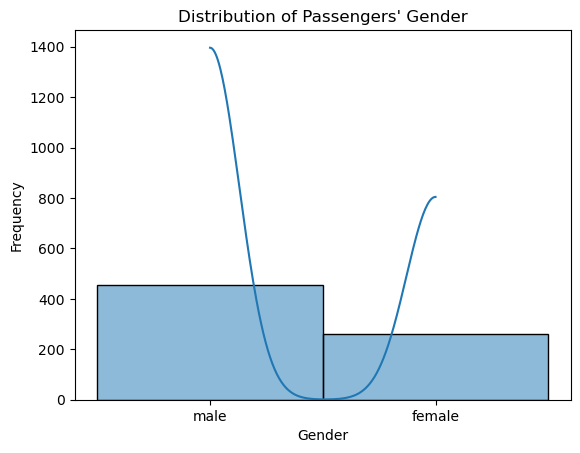

In [52]:
sns.histplot(df["Sex"], kde = 1)
plt.ylabel("Frequency")
plt.xlabel("Gender")
plt.title("Distribution of Passengers' Gender");

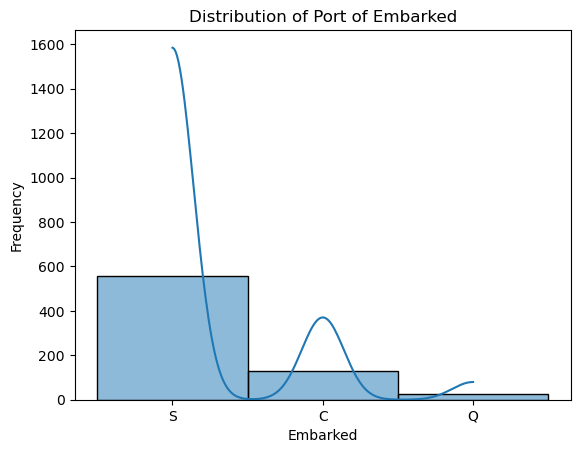

In [53]:
sns.histplot(df["Embarked"], kde = 1)
plt.ylabel("Frequency")
plt.title("Distribution of Port of Embarked");

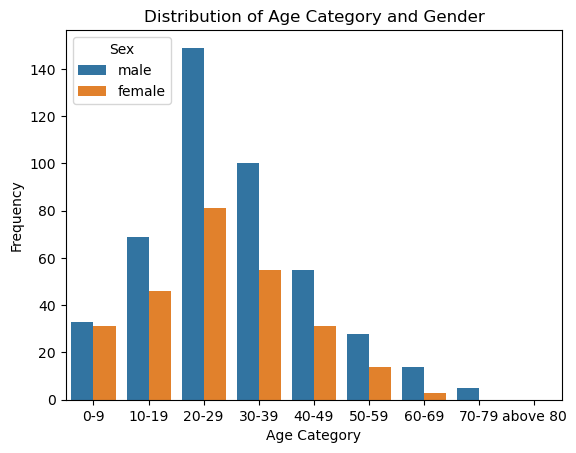

In [54]:
sns.countplot(data = df, x = "Age Category", hue = "Sex")
plt.ylabel("Frequency")
plt.title("Distribution of Age Category and Gender");

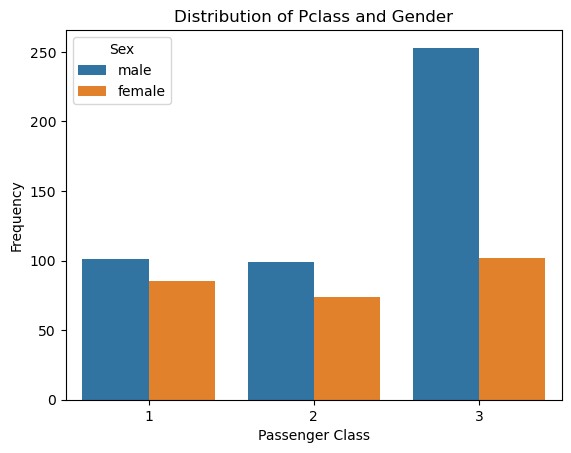

In [57]:
sns.countplot(data = df, x = "Pclass", hue = "Sex")
plt.ylabel("Frequency")
plt.xlabel("Passenger Class")
plt.title("Distribution of Pclass and Gender");

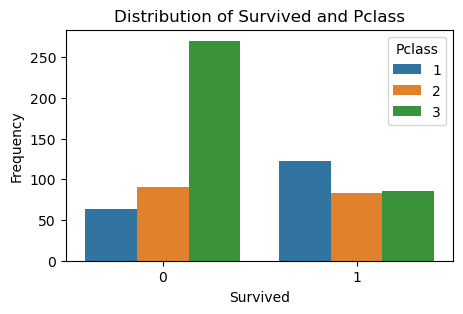

In [60]:
plt.figure(figsize= (5,3))
sns.countplot(data = df, x = "Survived", hue = "Pclass")
plt.ylabel("Frequency")
plt.xlabel("Survived")
plt.title("Distribution of Survived and Pclass");

In [61]:
# Average Age Of People that Survived(1) and those that didn't(0)
df.groupby("Survived")["Age"].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

# Analysis Questions

What percentage of passengers survived the Titanic? **40%**

What was the survival rate for each Pclass? **First Class = 42.068966, Second Class = 28.620690, Third Class = 29.310345**

Where gender and survival correlated? Provide statistics.

In [67]:
df['Survived'].corr(df['Sex'])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

What was the average age of survivors and non-survivors? **Non-Survivors = 30.6, Survivors = 28.3**

Did having siblings or spouses on board affect the survival rate? **Yes. Those with no siblings had the highest survival rate, followed by those with one sibling, then two, three and four**

What was the survival rate based on the port of embarkation? **Cherbourg (C) 27.241379, Queenstown (Q) 2.758621 and Southampton (S) 70.000000**

In [68]:
How did fare correlate with survival? Did higher fare-paying passengers have better survival?

Object `survival` not found.


In [69]:
Were age and Pclass correlated? Provide a visualization.

SyntaxError: invalid syntax (1772262432.py, line 1)

    What other insights can you draw from the dataset? Provide at least two additional observations supported by data and visualizations.
**Insights**: 
* We have 40% rate of survival
* The age category (20-29)on the board are the highest age range on board.
* Age 22-24 survived the most compare to other ages
* We have the highest survival rate from southampton
* We have many female survival compare to male

